In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.backends
from torch.nn import Module, Linear, ReLU
from torch.optim import SGD
from torch.nn import MSELoss

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.backends.cudnn.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: mps


# Generate Data

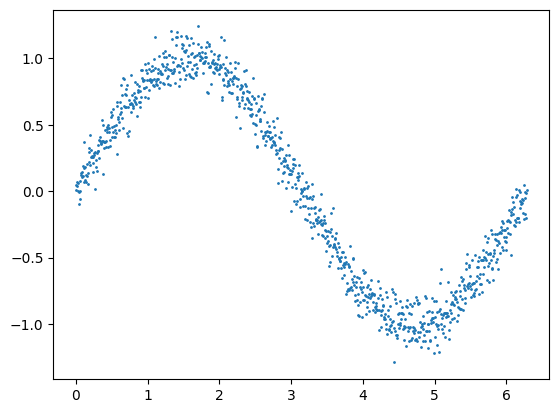

In [8]:
f = np.sin

x = np.linspace(0, 2 * np.pi, 1000)
eps = np.random.normal(0, 0.1, 1000)

y = f(x) + eps

plt.scatter(x, y, s=1)
plt.show()

# Train Model

In [9]:
class NNModel(Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NNModel, self).__init__()
        self.linear1 = Linear(input_size, hidden_size)
        self.relu = ReLU()
        self.linear2 = Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out
    
fhat = NNModel(1, 10000, 1)